# Evaluation of the long term dynamics of the model.

Data from runs over 3000 years for different possible income from trade.

Single trajectories are also evaluated, since the aggregate data does not give insight into the actual model behavior.

**NOTE:** These runs are done without climate variability. The variation is only caused by interplay of social and ecological dynamics in the system.

In [1]:
%pylab inline
pylab.rcParams['figure.figsize'] = (14, 6)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pickle as pkl

print(pd.__version__)

Populating the interactive namespace from numpy and matplotlib
0.24.2


In [4]:
location = '/home/jakob/Project_MayaSim/output_data/X10_adjust_agriculture/results/aggregated_trajectory'

data = pd.read_pickle(location)
print(data.index.levels)

[[0.25, 1.1], [0.08, 0.1, 0.12, 0.16, 10.0], [6000.0, 6400.0, 6800.0], ['mean', 'sum'], ['mean', 'sum'], [False, True], [False, True], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...], ['MAP', 'built trade links', 'es_income_agricultural_productivity', 'es_income_forest', 'es_income_pop_density', 'es_income_precipitation', 'es_income_waterflow', 'forest_state_1_cells', 'forest_state_2_cells', 'forest_state_3_cells', 'killed settlements', 'lost trade links', 'max settlement population', 'max_AG', 'max_ES', 'max_bca', 'max_cluster_size', 'max_npp', 'max_pop_grad', 'max_soil_deg', 'mean_cluster_size', 'mean_soil_degradation', 'mean_waterflow', 'new

In [3]:
data.head()

key                                                                                                                      <mean_trajectories>  \
r_bca r_es r_trade es_income_mode ag_income_mode better_ess kill_cropless timesteps observables                                                
0.25  0.08 6000.0  sum            sum            True       False         0         MAP                                          1544.697819   
                                                                                    built trade links                               0.000000   
                                                                                    es_income_agricultural_productivity             0.000000   
                                                                                    es_income_forest                             5502.568999   
                                                                                    es_income_pop_density                           0.000000   

key                                                                                                                      <sigma_trajectories>  
r_bca r_es r_trade es_income_mode ag_income_mode better_ess kill_cropless timesteps observables                                                
0.25  0.08 6000.0  sum            sum            True       False         0         MAP                                              0.000000  
                                                                                    built trade links                                0.000000  
                                                                                    es_income_agricultural_productivity              0.000000  
                                                                                    es_income_forest                               341.410202  
                                                                                    es_income_pop_density                            0.000000

In [28]:
d_selected = data.xs((1.1, 10., 'mean', 'mean', False, True), level=('r_bca', 'r_es', 'es_income_mode', 'ag_income_mode', 'better_ess', 'kill_cropless'), drop_level=True)
d_selected.head()

key                                                    <mean_trajectories>  \
r_trade timesteps observables                                                
6000.0  0         MAP                                          1544.697819   
                  built trade links                               0.000000   
                  es_income_agricultural_productivity          6364.901009   
                  es_income_forest                            24705.589225   
                  es_income_pop_density                           0.000000   

key                                                    <sigma_trajectories>  
r_trade timesteps observables                                                
6000.0  0         MAP                                              0.000000  
                  built trade links                                0.000000  
                  es_income_agricultural_productivity            405.887274  
                  es_income_forest                               923.063951  
                  es_income_pop_density                            0.000000

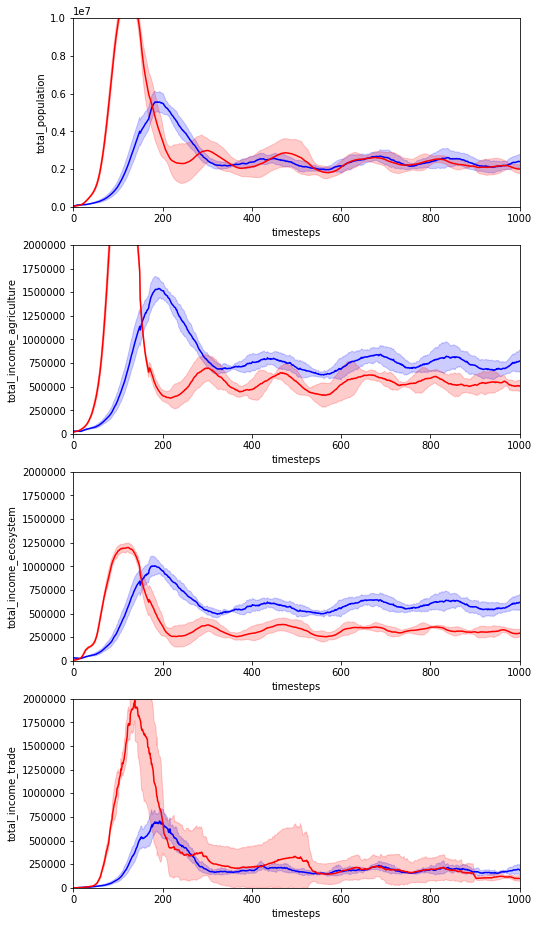

In [47]:
pylab.rcParams['figure.figsize'] = (8, 16)

# default configuration
d_old = data.xs((1.1, 10., 'mean', 'mean', False, True), level=('r_bca', 'r_es', 'es_income_mode', 'ag_income_mode', 'better_ess', 'kill_cropless'), drop_level=True)
d_new = data.xs((0.25, 0.1, 'sum', 'sum', True, False), level=('r_bca', 'r_es', 'es_income_mode', 'ag_income_mode', 'better_ess', 'kill_cropless'), drop_level=True)
r_t_o = [6000]
r_t_n = [6400]

def plot(obs, data, r_trade, ax, ymax, color='b'):
    for j, r in enumerate(r_trades):
        r = r_trade[0]
        dt = data['<mean_trajectories>'].xs(level=('r_trade', 'observables'), key=(r, obs))
        de = data['<sigma_trajectories>'].xs(level=('r_trade', 'observables'), key=(r, obs))
        dt.plot(ax=ax, color=color)
        dtt = de.index.values
        ddt = dt.values
        dde = de.values
        ax.fill_between(dtt, ddt - dde, ddt + dde, alpha=0.2, color=color)
        
        ax.set_xlim(0,1000)
        ax.set_ylim(0,ymax)
        ax.set_ylabel(obs)

p_max = 10000000
i_max = 2000000

fig, axes = plt.subplots(nrows=4, ncols=1)
plot('total_population', d_old, r_t_o, ax=axes[0], ymax=p_max)
plot('total_population', d_new, r_t_n, ax=axes[0], ymax=p_max, color='r')
plot('total_income_agriculture', d_old, r_t_o, ax=axes[1], ymax=i_max)
plot('total_income_agriculture', d_new, r_t_n, ax=axes[1], ymax=i_max, color='r')
# plot('total_income_agriculture', d_selected, r_trades)
plot('total_income_ecosystem', d_old, r_t_o, ax=axes[2], ymax=i_max)
plot('total_income_ecosystem', d_new, r_t_n, ax=axes[2], ymax=i_max, color='r')
plot('total_income_trade', d_old, r_t_o, ax=axes[3], ymax=i_max)
plot('total_income_trade', d_new, r_t_n, ax=axes[3], ymax=i_max, color='r')


**The plots above show the long run data (aggregated from 50 runs) for total population and and different sources of income**

We see:

* initially: strong overshoot and collapse behavior with little variance between runs,
* after: oscillatory behavior with bigger variance between runs.

Lets look at some individual runs to see the actual dynamics.

In [89]:
location = '/home/jakob/Project_MayaSim/output_data/X10_adjust_agriculture/results/all_trajectories'

# new setup
all_data = pd.read_pickle(location).xs((0.25, 0.12, 'sum', 'sum', True, False), level=('r_bca', 'r_es', 'es_income_mode', 'ag_income_mode', 'better_ess', 'kill_cropless'), drop_level=True)

# original setup
# all_data = pd.read_pickle(location).xs((1.1, 10., 'mean', 'mean', False, True), level=('r_bca', 'r_es', 'es_income_mode', 'ag_income_mode', 'better_ess', 'kill_cropless'), drop_level=True)

all_data.head()

key,trajectory_list,trajectory_list,trajectory_list,trajectory_list
r_trade,,,,
6000.0,time total_population max settlement p...,time total_population max settlement p...,time total_population max settlement p...,time total_population max settlement p...
6400.0,time total_population max settlement p...,time total_population max settlement p...,time total_population max settlement p...,time total_population max settlement p...
6800.0,time total_population max settlement p...,time total_population max settlement p...,time total_population max settlement p...,time total_population max settlement p...


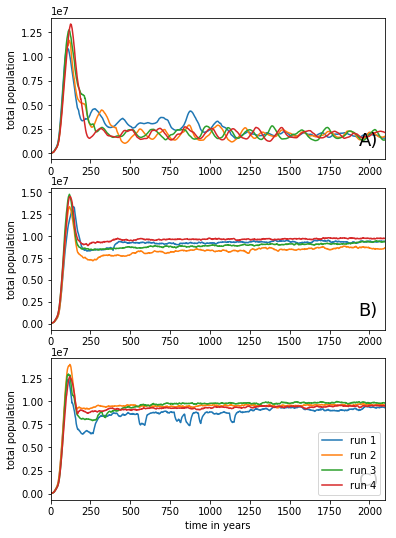

In [90]:
pylab.rcParams['figure.figsize'] = (6, 12)


runs  = range(0, 4)
all_data.columns = runs
r_trades = all_data.index.values
fig = plt.figure()

annotations=['A)', 'B)', 'C)', 'D)']
for i, r_trade in enumerate(r_trades):
    
    ax = fig.add_subplot(4, 1, i + 1)
    observable = 'total_population'

    for run in runs:
        all_data.loc[r_trade, run][observable].plot(legend=(True if i == len(r_trades) - 1 else False))
    ax.set_xlim([0,2100])
    ax.annotate(annotations[i], xy=(0,0), xycoords='data', xytext=(0.92, 0.1), textcoords='axes fraction', fontsize=18)
    ax.set_ylabel('total population')
    if i == len(r_trades)-1:
        ax.set_xlabel('time in years')
        leg = ax.get_legend()
        for j, text in enumerate(leg.get_texts()):
            text.set_text('run {}'.format(j+1))

plt.savefig('longterm_population_development.pdf')

**The plots above show the total population of single two single runs for different possible trade income.**

We see:

* cyclical rise and fall for low possible income from trade,
* stable society with high trade income with higher possible income from trade

This is in accordance with findings in archeological reserach that state that there have been cycles of growth and collapse in the Maya civilisation from 2000 BC to ~ 0 BC and that only after that in the socalled Classical Period a signifficant overshoot and collapse without recovery was observed.

In our model, this can be reproduced via an increase in trade efficiency, that leads to qualitatively different model behavior.

/home/jakob/anaconda3/envs/mayas2/lib/python3.6/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


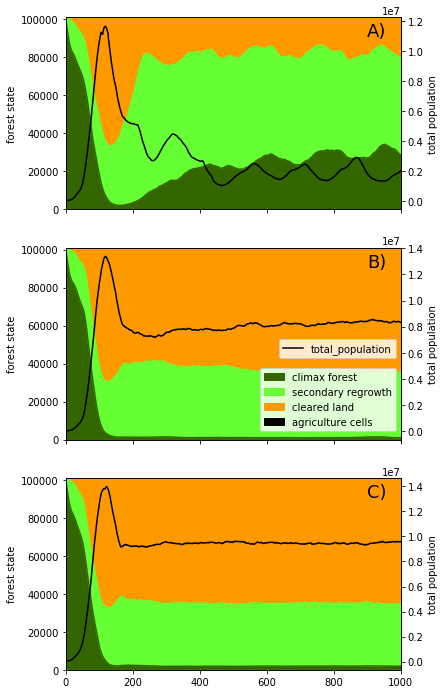

In [78]:
pylab.rcParams['figure.figsize'] = (6, 12)
# all_data.columns = range(0,2)
# all_data.loc[6000, 1]

runs  = range(0, 2)
r_trades = all_data.index.values
fig = plt.figure()

annotations=['A)', 'B)', 'C)']
colors = ['#336600', '#66FF33', '#FF9900', 'black']
for i, r_trade in enumerate(r_trades[[0,1,2]]):
    
    ax = fig.add_subplot(3, 1, i + 1)
    observables = ['forest_state_3_cells', 'forest_state_2_cells', 'forest_state_1_cells', 'total_agriculture_cells']
    forest_data = all_data.loc[r_trade, run][observables]
    forest_data['forest_state_1_cells'] = forest_data['forest_state_1_cells'].sub(forest_data['total_agriculture_cells'])
    forest_data.columns = ['climax forest', 'secondary regrowth', 'cleared land', 'agriculture cells']
    run = 1
    ln1 = forest_data.plot.area(stacked=True, 
                                legend=(True if i == len(r_trades) - 2 else False), 
                                ax=ax,
                                color=colors)
    ax2 = ax.twinx()
    ln2 = all_data.loc[r_trade, run]['total_population'].plot(legend=(True if i == len(r_trades) - 2 else False), 
                                                              ax=ax2, 
                                                              color='k')
    #print(all_data.loc[r_trade, run][observables])
    ax.set_xlim([0,1000])
    ax.annotate(annotations[i], xy=(0,0), xycoords='data', xytext=(0.9, 0.9), textcoords='axes fraction', fontsize=18)
    ax2.set_ylabel('total population')
    ax.set_ylabel('forest state')
    ax.set_ylim([0, 101000])
    if i == len(r_trades)-2:
        ax.set_xlabel('time in years')
        lgd2 = ax.legend(loc=1, bbox_to_anchor=[1, .4])
        lgd1 = ax2.legend(loc=1, bbox_to_anchor=[1., .55])
#fig.tight_layout()
fig.savefig('longterm_population_development.pdf', transparent=True, dpi=200)

Jona suggested, that these simulations show very little agricultural activity, which is very different from the original results by Heckbert. I can not really make this out from these plots, since in Heckberts results, he only shows income from agriculture and not agriculture cells vs. other states of cells.

If the data is there, I will try to plot the above plot with different sources of income for better comparibility.

r_trade = 6000.0


/home/jakob/anaconda3/envs/mayas2/lib/python3.6/site-packages/ipykernel/__main__.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


r_trade = 6400.0
r_trade = 6800.0


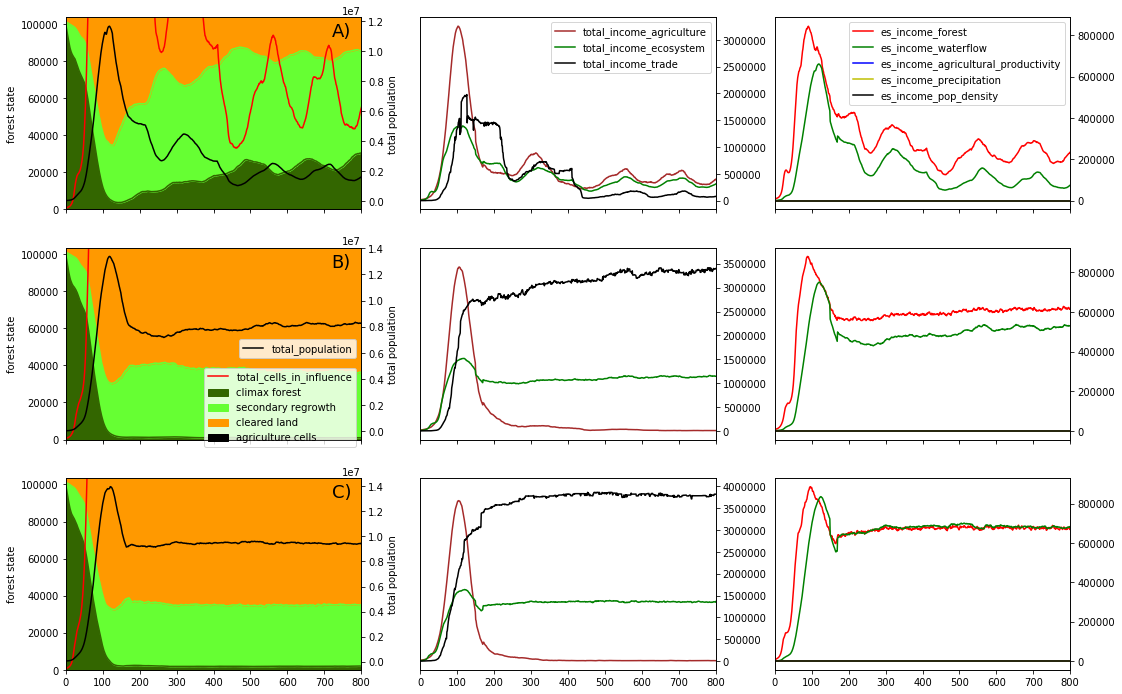

In [85]:
location = '/home/jakob/Project_MayaSim/output_data/X10_adjust_agriculture/results/all_trajectories'
all_data = pd.read_pickle(location).xs((0.25, 0.12, 'sum', 'sum', True, False), level=('r_bca', 'r_es', 'es_income_mode', 'ag_income_mode', 'better_ess', 'kill_cropless'), drop_level=True)
all_data.head()
pylab.rcParams['figure.figsize'] = (18, 12)
all_data.columns = range(0,4)
# all_data.loc[6000, 1]

runs  = range(0, 2)
r_trades = all_data.index.values
fig = plt.figure()

annotations=['A)', 'B)', 'C)']
colors = ['#336600', '#66FF33', '#FF9900', 'black']
for i, r_trade in enumerate(r_trades[[0,1,2]]):
    print(f'r_trade = {r_trade}')
    
    ax = fig.add_subplot(3, 3, 3*i + 1)
    ax2 = ax.twinx()
    ax3a = fig.add_subplot(3, 3, 3*i + 2)
    ax3 = ax3a.twinx()
    ax4a = fig.add_subplot(3, 3, 3*i + 3)
    ax4 = ax4a.twinx()
    observables = ['forest_state_3_cells', 'forest_state_2_cells', 'forest_state_1_cells', 'total_agriculture_cells']
    forest_data = all_data.loc[r_trade, run][observables]
    forest_data['forest_state_1_cells'] = forest_data['forest_state_1_cells'].sub(forest_data['total_agriculture_cells'])
    forest_data.columns = ['climax forest', 'secondary regrowth', 'cleared land', 'agriculture cells']
    run = 1
    ln1 = forest_data.plot.area(stacked=True, 
                                legend=(True if i == len(r_trades) - 2 else False), 
                                ax=ax,
                                color=colors)
    ln2 = all_data.loc[r_trade, run]['total_population'].plot(legend=(True if i == len(r_trades) - 2 else False), 
                                                              ax=ax2, 
                                                              color='k')
    ln3 = all_data.loc[r_trade, run]['total_income_agriculture'].plot(legend=(True if i == 0 else False), 
                                                              ax=ax3, 
                                                              color='brown')
    ln4 = all_data.loc[r_trade, run]['total_income_ecosystem'].plot(legend=(True if i == 0 else False), 
                                                              ax=ax3, 
                                                              color='g')
    ln5 = all_data.loc[r_trade, run]['total_income_trade'].plot(legend=(True if i == 0 else False), 
                                                              ax=ax3, 
                                                              color='k')
    eco_lns = []
    eco_cls = ['r', 'g', 'b', 'y', 'k']
    for k, var in enumerate(['es_income_forest', 'es_income_waterflow', 'es_income_agricultural_productivity', 'es_income_precipitation', 'es_income_pop_density']):
        ln = all_data.loc[r_trade, run][var].plot(legend=(True if i == 0 else False), 
                                                              ax=ax4, 
                                                              color=eco_cls[k])
        eco_lns.append(ln)
    ln5 = all_data.loc[r_trade, run]['total_cells_in_influence'].plot(legend=False, 
                                                          ax=ax, 
                                                          color='r')
    
    ax3a.set_yticklabels([])
    ax3a.set_yticks([])
    ax4a.set_yticklabels([])
    ax4a.set_yticks([])
    
    tmax = 800
    #print(all_data.loc[r_trade, run][observables])
    ax.set_xlim([0,tmax])
    ax3.set_xlim([0,tmax])
    ax4.set_xlim([0,tmax])
    ax.annotate(annotations[i], xy=(0,0), xycoords='data', xytext=(0.9, 0.9), textcoords='axes fraction', fontsize=18)
    ax2.set_ylabel('total population')
    ax.set_ylabel('forest state')
    ax.set_ylim([0, 103500])
    if i == len(r_trades)-2:
        ax.set_xlabel('time in years')
        ax3.set_xlabel('time in years')
        lgd2 = ax.legend(loc=1, bbox_to_anchor=[1, .4])
        lgd1 = ax2.legend(loc=1, bbox_to_anchor=[1., .55])
#fig.tight_layout()
fig.savefig('longterm_population_development.pdf', transparent=True, dpi=200)

Compared to Heckbert2013 fig. 5 these results suggest, that his configuration is similar to that in pannel A) but with a bit higher income from trade and lower ecosystem services value.

Therefore, I should set up an experiment that starts with this configuration and then tweaks these two variables in the respective direction to see at which point I can generate comparable results.

In [ ]:
all_data.to_pi